# Loan Eligibility Prediction

### import require packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# 1. Load the Dataset

In [5]:
df = pd.read_csv("Loan_default.csv")

# 2. Perform Exploratory Data Analysis or Data preprocessing

In [6]:
df.shape

(255347, 18)

In [7]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69.0,50432.0,124440.0,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32.0,31713.0,44799.0,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60.0,20437.0,9139.0,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,NaN,0


## 1. Missing Values

In [8]:
df.isnull().sum()

LoanID             0
Age               21
Income            51
LoanAmount         1
CreditScore        0
MonthsEmployed     0
NumCreditLines     0
InterestRate       0
LoanTerm           0
DTIRatio           1
Education         14
EmploymentType     0
MaritalStatus     26
HasMortgage       15
HasDependents     25
LoanPurpose       34
HasCoSigner       12
Default            0
dtype: int64

In [9]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Age 0.0001  % missing values
Income 0.0002  % missing values
Education 0.0001  % missing values
MaritalStatus 0.0001  % missing values
HasMortgage 0.0001  % missing values
HasDependents 0.0001  % missing values
LoanPurpose 0.0001  % missing values
HasCoSigner 0.0  % missing values


In [10]:
# Fill value by mean mode 

df['Income'].fillna(df['Income'].mean(), inplace=True)

df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0],inplace=True)
df['HasMortgage'].fillna(df['HasMortgage'].mode()[0],inplace=True)
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True) 
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True)                        

df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## 2. Numerical Variables

In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56.0,85994.0,50587.0,520,80,4,15.23,36,0.44,0
1,69.0,50432.0,124440.0,458,15,1,4.81,60,0.68,0
2,46.0,84208.0,129188.0,451,26,3,21.17,24,0.31,1
3,32.0,31713.0,44799.0,743,0,3,7.07,24,0.23,0
5,25.0,90298.0,90448.0,720,18,2,22.72,24,0.10,1


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


### Discrete variable

In [14]:
discrete_feature


['NumCreditLines', 'LoanTerm', 'Default']

In [15]:
df[discrete_feature].head()


,NumCreditLines,LoanTerm,Default
0,4,36,0
1,1,60,0
2,3,24,1
3,3,24,0
5,2,24,1


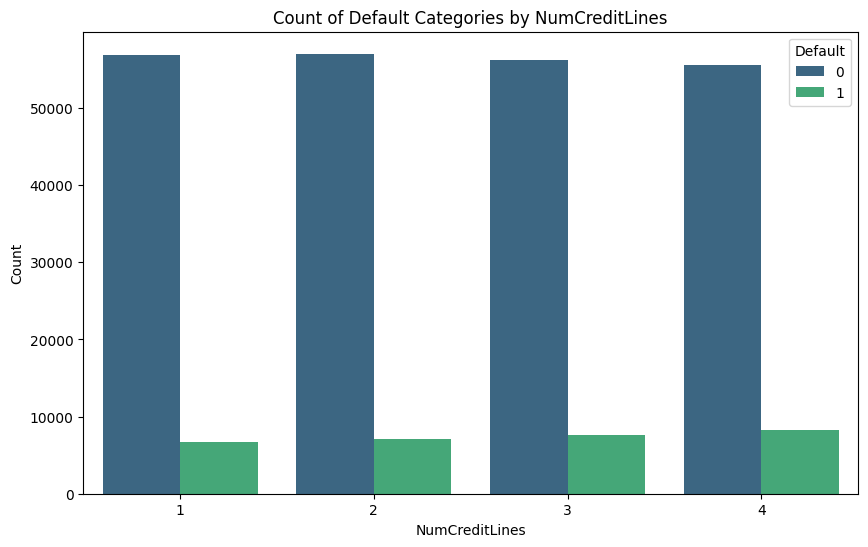

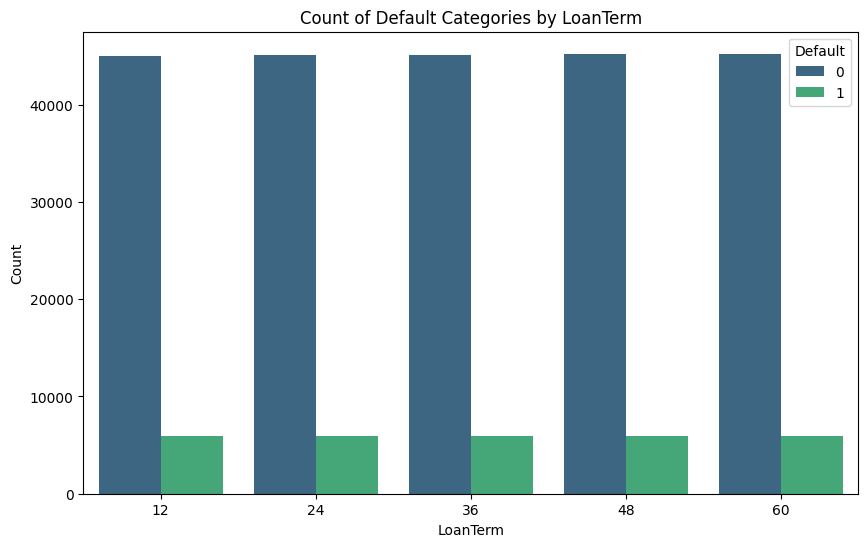

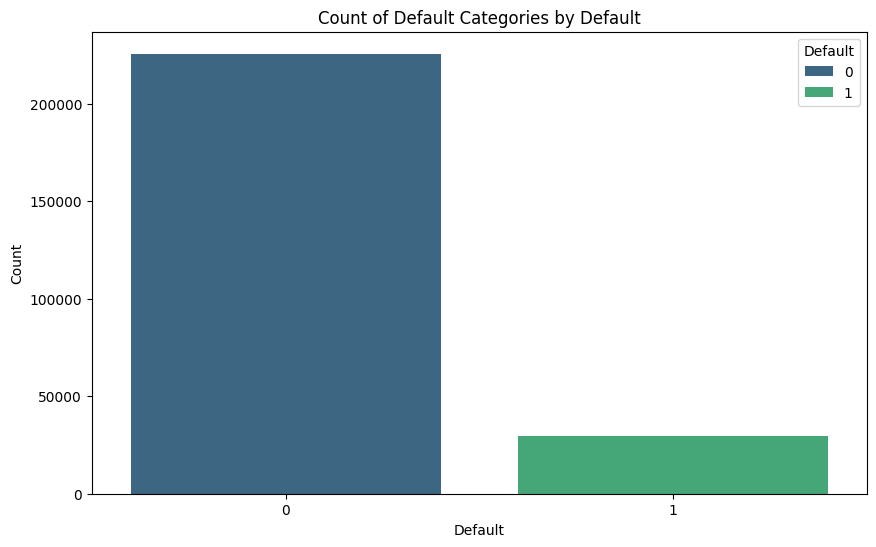

In [16]:
## Lets Find the realtionship between them and Loan eligibility

for feature in discrete_feature:
    data = df.copy()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Default', data=data, palette='viridis')
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Default Categories by {feature}')
    plt.legend(title='Default', loc='upper right')
    plt.show()

### Continuous Variable

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


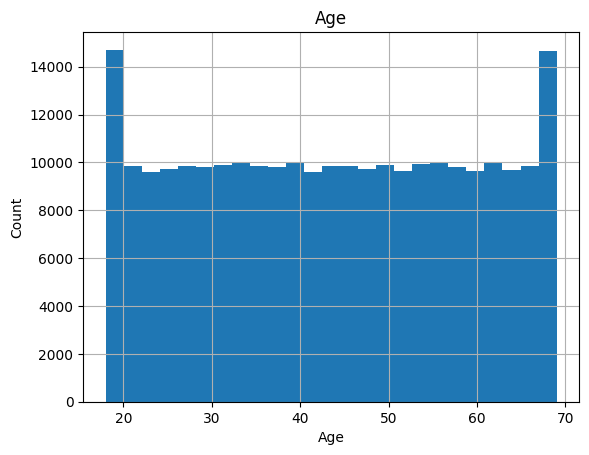

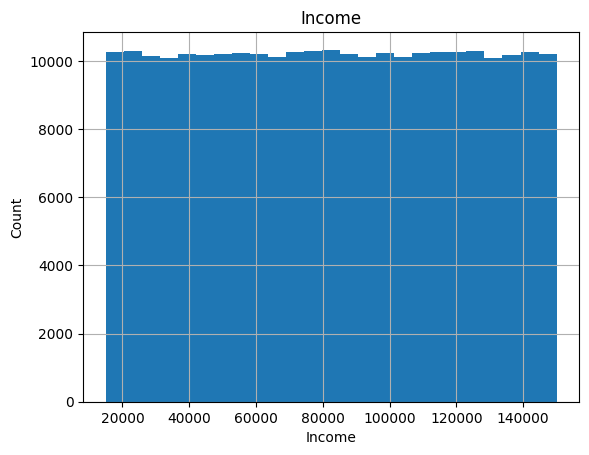

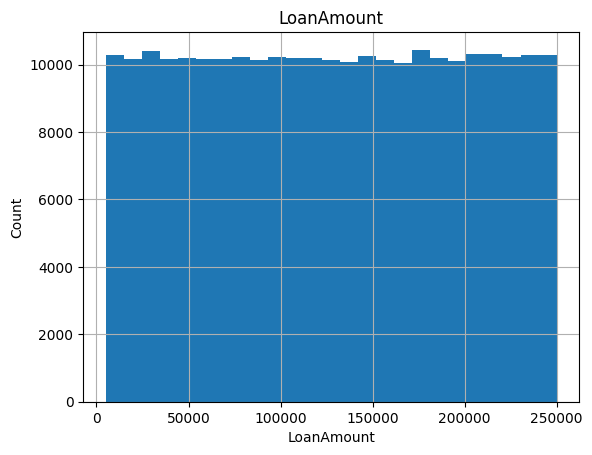

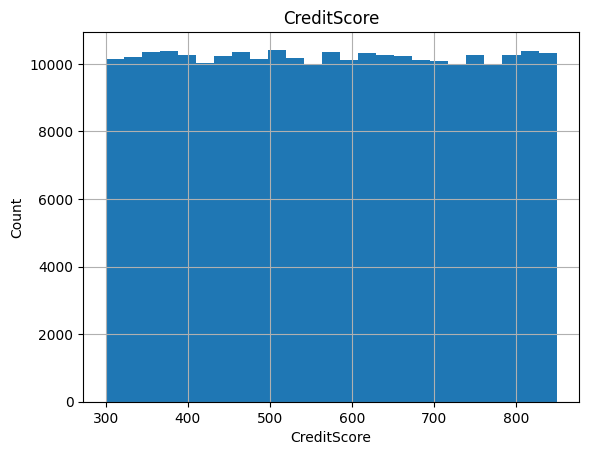

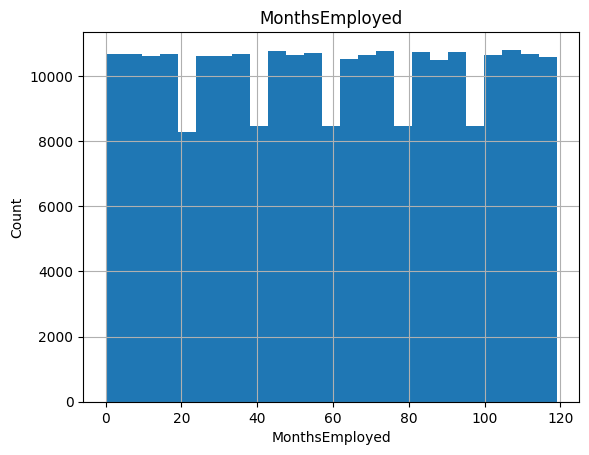

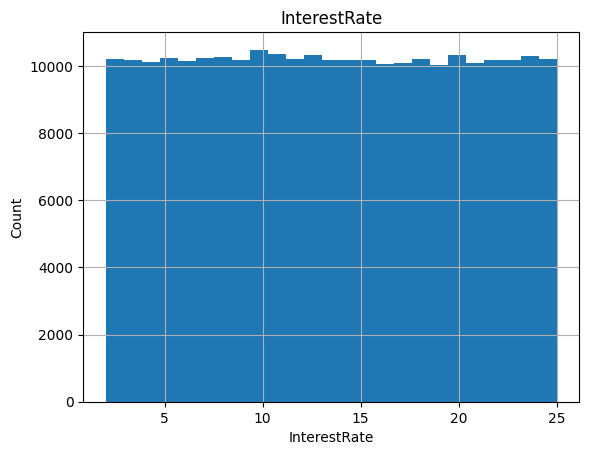

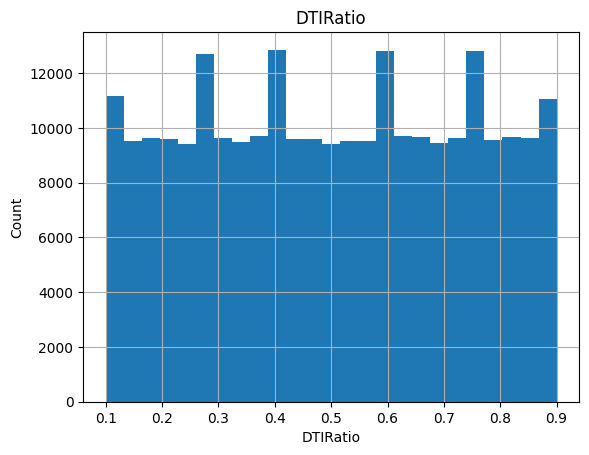

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

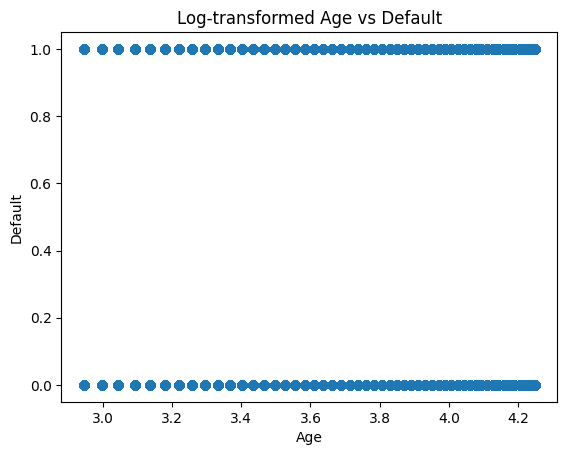

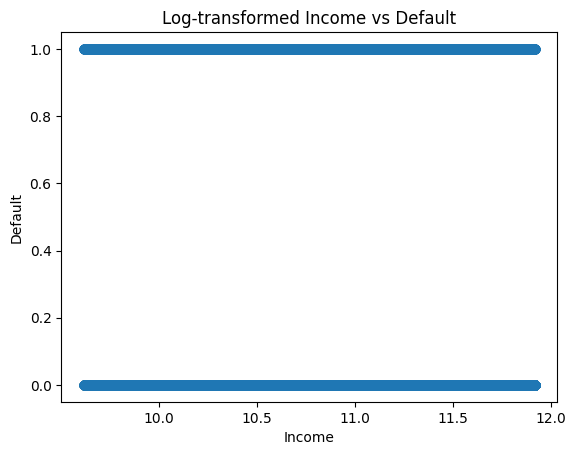

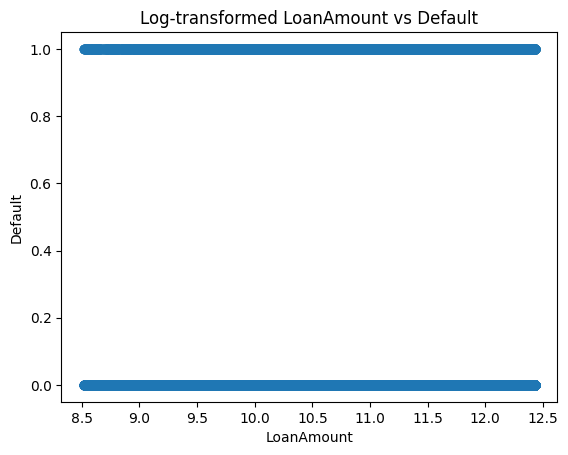

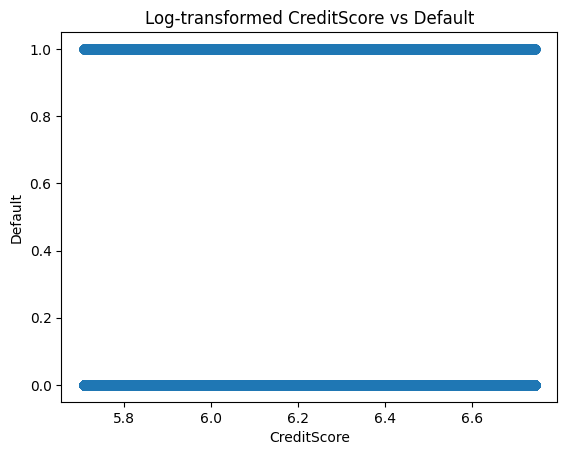

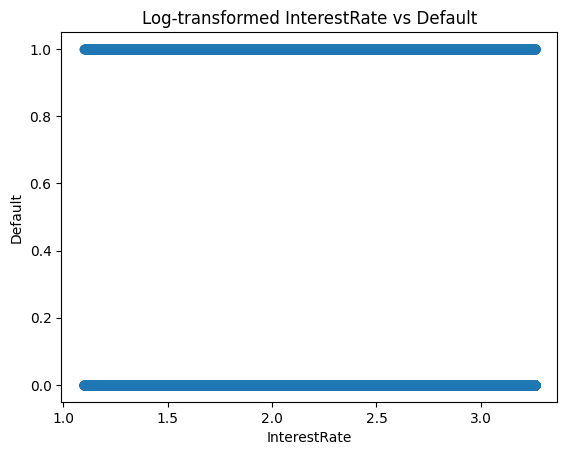

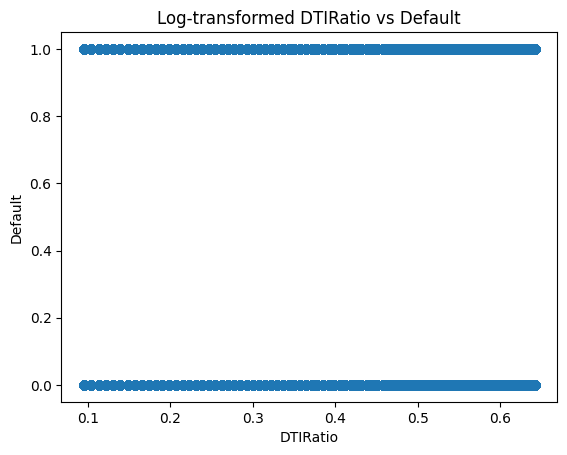

In [19]:
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        plt.scatter(data[feature], data['Default'])
        plt.xlabel(feature)
        plt.ylabel('Default')
        plt.title(f'Log-transformed {feature} vs Default')
        plt.show()

## 3.Outliers

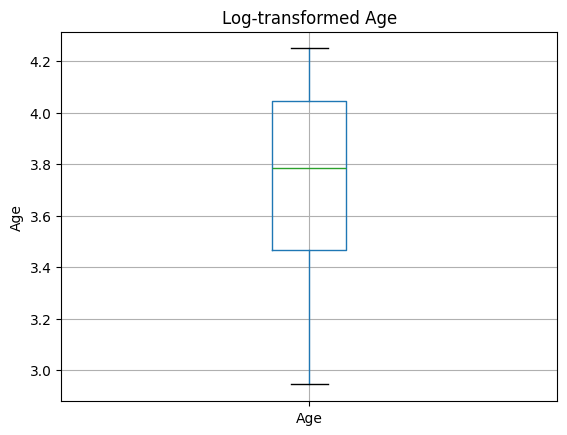

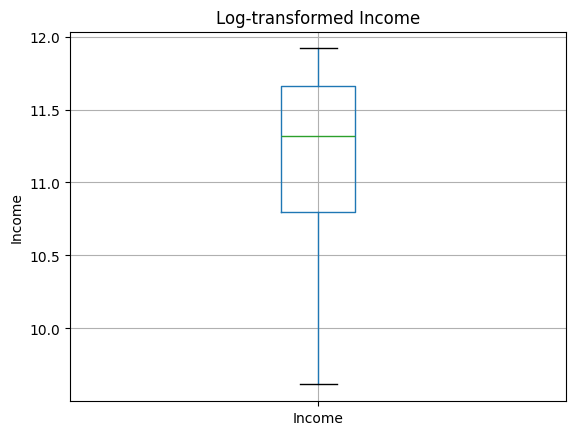

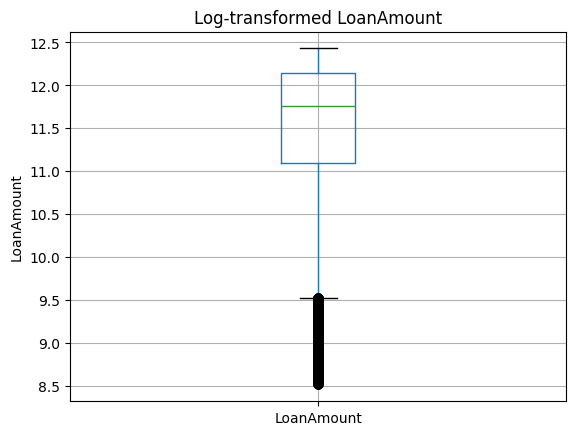

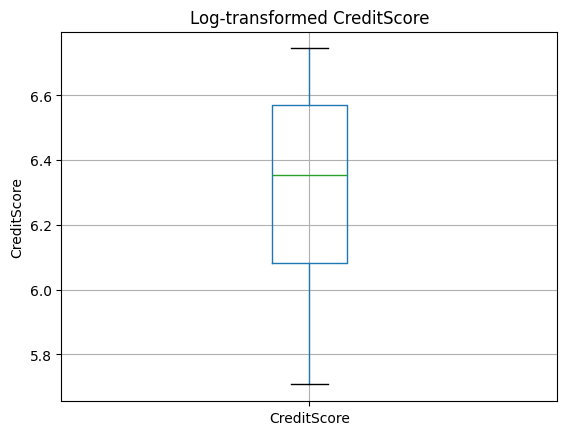

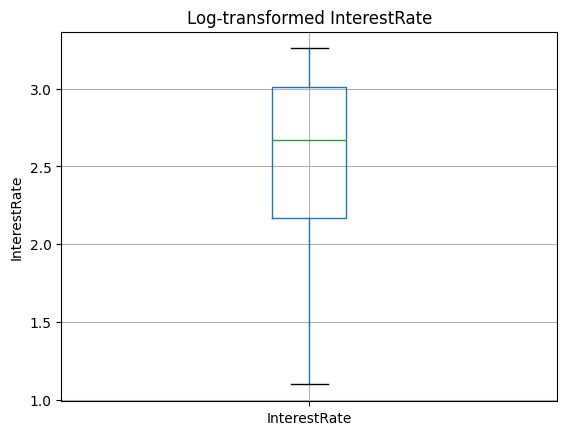

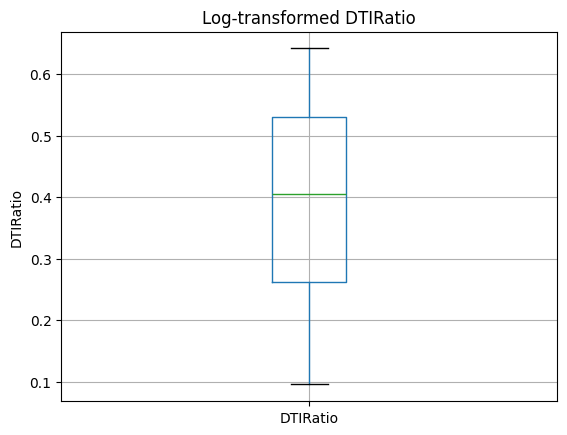

In [20]:
# Plot boxplots for log-transformed features
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(f'Log-transformed {feature}')
        plt.show()

### Categorical Variables


In [21]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']

if 'LoanID' in categorical_features:
    categorical_features.remove('LoanID')

categorical_features
categorical_features

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [22]:
df[categorical_features].head()


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
5,High School,Unemployed,Married,Yes,No,Business,Yes


In [23]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Education and number of categories are 4
The feature is EmploymentType and number of categories are 4
The feature is MaritalStatus and number of categories are 3
The feature is HasMortgage and number of categories are 2
The feature is HasDependents and number of categories are 2
The feature is LoanPurpose and number of categories are 5
The feature is HasCoSigner and number of categories are 2


### Find out the relationship between categorical variable and dependent feature Default


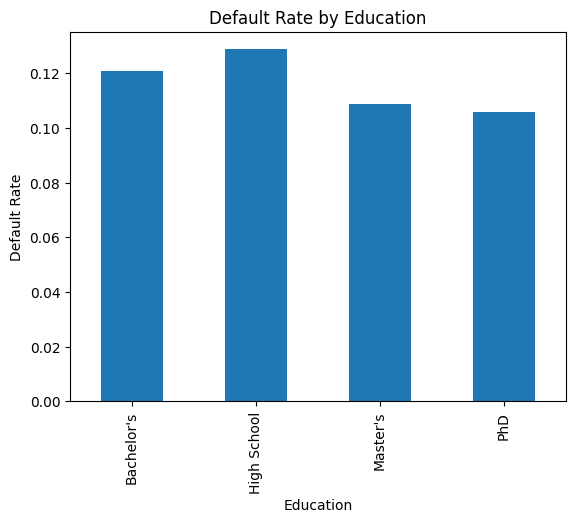

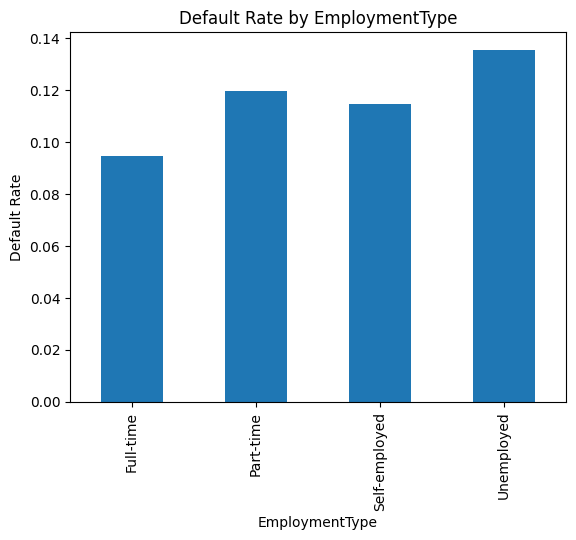

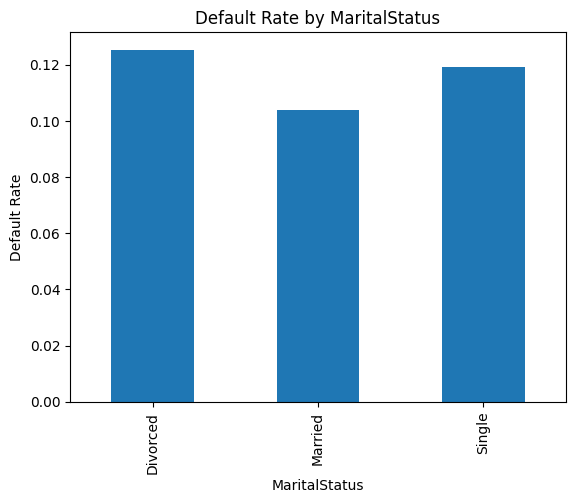

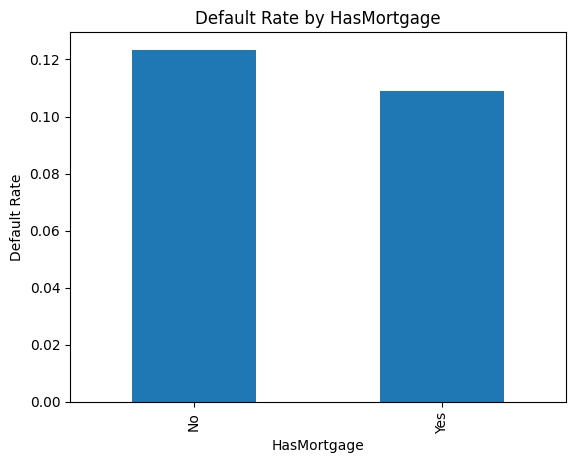

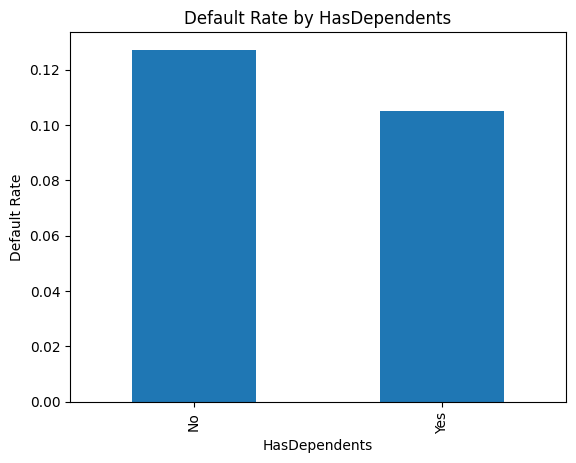

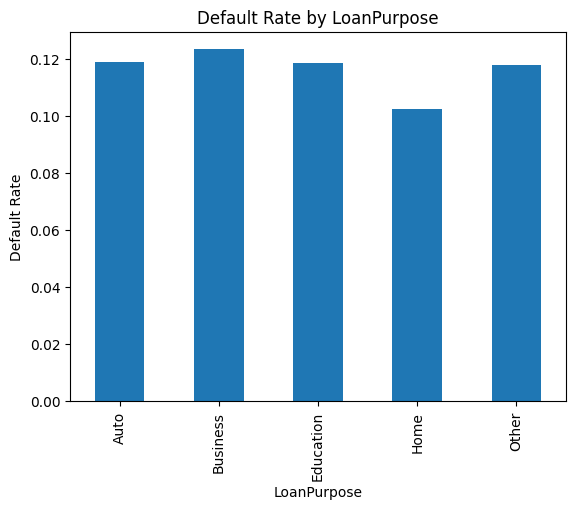

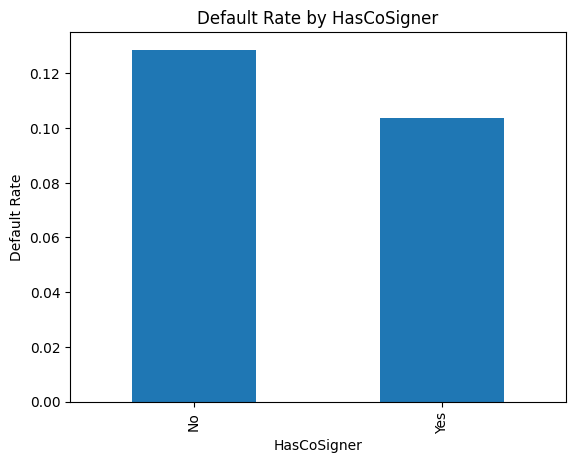

In [24]:
# Plot default rate (mean of 'Default') for each categorical feature
for feature in categorical_features:
    data = df.copy()
    default_rate = data.groupby(feature)['Default'].mean()
    default_rate.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.title(f'Default Rate by {feature}')
    plt.show()

## 4. Label encoding

In [25]:
# convort the categorical into numerical 
from sklearn.preprocessing import LabelEncoder

df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['EmploymentType'] = LabelEncoder().fit_transform(df['EmploymentType'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['HasMortgage'] = LabelEncoder().fit_transform(df['HasMortgage'])
df['HasDependents'] = LabelEncoder().fit_transform(df['HasDependents'])
df['LoanPurpose'] = LabelEncoder().fit_transform(df['LoanPurpose'])
df['HasCoSigner'] = LabelEncoder().fit_transform(df['HasCoSigner'])

## 5. Deal with imbalanced Data (SMOTE)

In [26]:
# pip install imbalanced-Learn

class_0_count, class_1_count = df['Default'].value_counts()

# separate  the class 1, 0 into 2 df
df_class_0 = df[df['Default']==0]
df_class_1 = df[df['Default']==1]

print(df_class_0['Default'].value_counts())
print(df_class_1['Default'].value_counts())

0    225650
Name: Default, dtype: int64
1    29649
Name: Default, dtype: int64


In [27]:
## class 0 ==> 60000
#  class 1 ==> 29649
# merge together

df_class_0 = df_class_0.sample(60000)

df2 = pd.concat([df_class_1, df_class_0],axis= 0)
df2.value_counts()

LoanID      Age   Income    LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default
000ELHLBPV  37.0  81658.0   152598.0    792          23              4               14.06         24        0.86      3          2               1              1            0              0            0            1          1
NYYAENQDJ1  35.0  135824.0  164808.0    684          9               2               17.06         24        0.57      2          0               0              0            1              0            0            0          1
NZ14AKRDA6  52.0  74608.0   236586.0    722          110             4               17.65         12        0.73      1          0               1              0            1              1            1            0          1
NZ0NABK2IO  54.0  109164.0  120225.0    829          35              3               2.12    

In [28]:
x = df2.drop(['LoanID','Default','MaritalStatus','LoanTerm'],axis = 'columns')
y = df2['Default']
print(y.value_counts())
x.value_counts

0    60000
1    29649
Name: Default, dtype: int64


<bound method DataFrame.value_counts of          Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
2       46.0   84208.0    129188.0          451              26   
5       25.0   90298.0     90448.0          720              18   
8       36.0   42053.0     92357.0          827              83   
11      28.0  149227.0    139759.0          375              56   
18      19.0   40718.0     78515.0          319             119   
...      ...       ...         ...          ...             ...   
153886  35.0  136637.0    132197.0          400             117   
129112  47.0  106075.0    191570.0          333              75   
126653  56.0   42604.0     47806.0          708              13   
225104  32.0  133755.0    243539.0          699              59   
30725   55.0  109192.0    122511.0          575              41   

        NumCreditLines  InterestRate  DTIRatio  Education  EmploymentType  \
2                    3         21.17      0.31          2               3   
5

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()


1    60000
0    60000
Name: Default, dtype: int64

# 2. Feature Selection

### Scaling the data

In [30]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x_sm),columns=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'])
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.549020,0.512656,0.506898,0.275046,0.218487,0.666667,0.833478,0.2625,0.666667,1.000000,1.0,1.0,0.00,0.0
1,0.137255,0.557767,0.348773,0.765027,0.151261,0.333333,0.900870,0.0000,0.333333,1.000000,1.0,0.0,0.25,1.0
2,0.352941,0.200394,0.356565,0.959927,0.697479,0.000000,0.953913,0.1250,0.000000,0.666667,1.0,0.0,0.50,0.0
3,0.196078,0.994281,0.550046,0.136612,0.470588,0.666667,0.166957,0.8750,1.000000,0.000000,0.0,0.0,0.50,1.0
4,0.019608,0.190505,0.300066,0.034608,1.000000,0.333333,0.521739,0.0875,0.000000,0.666667,1.0,0.0,0.50,0.0


## Split the data into training and testing dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x_sm, y_sm, train_size= 0.7, random_state=12350, stratify=y_sm)

# 3. Model Building

In [32]:
class Models:
    def __init__(self ,X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        

    # Built the Logistic Regression model
    def model_LG(self):
        from sklearn.linear_model import LogisticRegressionCV
        model_lg = LogisticRegressionCV().fit(self.X_train, self.Y_train)
        return model_lg

    # Built the Naive Bayes 
    def model_NB(self):
        from sklearn.naive_bayes import GaussianNB
        model_nb = GaussianNB().fit(self.X_train, self.Y_train)
        return model_nb

    # Built the KNN model
    def model_KNN(self):
        from sklearn.neighbors import KNeighborsClassifier
        model_knn = KNeighborsClassifier().fit(self.X_train, self.Y_train)
        return model_knn

    # Built the Support Vector Machine
    def model_SVM(self):
        from sklearn.svm import SVC
        model_svm = SVC(C=3.0).fit(self.X_train, self.Y_train)
        return model_svm
        
    # Built the Decison tree model 
    def model_DT(self):
        from sklearn.tree import DecisionTreeClassifier
        model_dt = DecisionTreeClassifier().fit(self.X_train, self.Y_train)
        return model_dt

    # Built the model for Random forest
    def model_Rand_forest(self):
        from sklearn.ensemble import RandomForestClassifier
        model_rand_forest = RandomForestClassifier().fit(self.X_train, self.Y_train)
        return model_rand_forest

    # Built the catboost model
    def model_Cat_Boost(self):
        from catboost import CatBoostClassifier
        model_catboost = CatBoostClassifier().fit(self.X_train, self.Y_train)
        return model_catboost

    # Built the adaboost model
    def model_Ada_Boost(self):
        from sklearn.ensemble import AdaBoostClassifier
        model_adaboost = AdaBoostClassifier().fit(self.X_train, self.Y_train)
        return model_adaboost

    def model_XG_Boost(self):
        from xgboost import XGBClassifier
        model_xgboost = XGBClassifier().fit(self.X_train, self.Y_train)
        return model_xgboost

## Model Evaluation code

In [30]:
class Model_Evaluation_class:
    def __init__(self ,x_test, y_test):
        self.x_test = x_test
        self.y_test = y_test

    def Classification_Report(self, model):
        from sklearn.metrics import classification_report
        return classification_report(self.y_test, model.predict(self.x_test))

    def model_evaluate(self, model, model_name):
        from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
        
        Accuracy = accuracy_score(self.y_test, model.predict(self.x_test))
        Precision = precision_score(self.y_test, model.predict(self.x_test))
        Recall = recall_score(self.y_test, model.predict(self.x_test))
        f1_Score = f1_score(self.y_test, model.predict(self.x_test))
        return model_name,Accuracy,Precision,Recall,f1_Score

### Build multiple model

In [31]:
m2 = Models(X_train,Y_train)
models = [(m2.model_LG(),"LogisticRegression",(0,0)),(m2.model_KNN(), "KNeighborsClassifier",(0,1)),
          (m2.model_NB(),"Naive Bayes",(1,0)),(m2.model_SVM(),"Support Vector Machine",(1,1)),
          (m2.model_DT(),"DecisionTreeClassifier",(2,0)),(m2.model_Rand_forest(),"RandomForest",(2,1)),
         (m2.model_Ada_Boost(), "AdaBoost",(3,0)), (m2.model_Cat_Boost(),"Cat_Boost",(3,1)),
         (m2.model_XG_Boost(), "XGBoost",(4,0))]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning rate set to 0.068328
0:	learn: 0.6776065	total: 55.2ms	remaining: 55.2s
1:	learn: 0.6639050	total: 61.2ms	remaining: 30.5s
2:	learn: 0.6521102	total: 67.1ms	remaining: 22.3s
3:	learn: 0.6417794	total: 73ms	remaining: 18.2s
4:	learn: 0.6329304	total: 78.9ms	remaining: 15.7s
5:	learn: 0.6245792	total: 84.9ms	remaining: 14.1s
6:	learn: 0.6173444	total: 91.1ms	remaining: 12.9s
7:	learn: 0.6110933	total: 97.3ms	remaining: 12.1s
8:	learn: 0.6052568	total: 103ms	remaining: 11.4s
9:	learn: 0.5997549	total: 109ms	remaining: 10.8s
10:	learn: 0.5949271	total: 116ms	remaining: 10.4s
11:	learn: 0.5905262	total: 122ms	remaining: 10s
12:	learn: 0.5865384	total: 128ms	remaining: 9.71s
13:	learn: 0.5829453	total: 134ms	remaining: 9.44s
14:	learn: 0.5795635	total: 140ms	remaining: 9.2s
15:	learn: 0.5762539	total: 146ms	remaining: 9s
16:	learn: 0.5732884	total: 152ms	remaining: 8.81s
17:	learn: 0.5705452	total: 158ms	remaining: 8.64s
18:	learn: 0.5679412	total: 165ms	remaining: 8.52s
19:	learn: 

## Evaluate all models


In [32]:
model_evaluation_obj = Model_Evaluation_class(x_test, y_test)
Results2 = []
for model,model_name,_ in models:
    Results2.append(model_evaluation_obj.model_evaluate(model, model_name))

df2 = pd.DataFrame(Results2,columns=['Algorithm','Accuracy', 'Precision', 'Recall', 'F1_Score'])
df2

,Algorithm,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression,0.688583,0.692094,0.679444,0.685711
1,KNeighborsClassifier,0.629944,0.617893,0.681056,0.647939
2,Naive Bayes,0.695056,0.675937,0.749389,0.710770
3,Support Vector Machine,0.584472,0.626026,0.419611,0.502445
4,DecisionTreeClassifier,0.661861,0.659164,0.670333,0.664702
5,RandomForest,0.748944,0.761131,0.725611,0.742947
6,AdaBoost,0.730389,0.724745,0.742944,0.733732
7,Cat_Boost,0.787917,0.828027,0.726778,0.774106
8,XGBoost,0.758583,0.773521,0.731278,0.751806


## Classification report for all models

In [33]:
for model,model_name,_ in models:
    print(f"Classification report for {model_name} is :")
    print(model_evaluation_obj.Classification_Report(model))
    print("-"*80)

Classification report for LogisticRegression is :
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     18000
           1       0.69      0.68      0.69     18000

    accuracy                           0.69     36000
   macro avg       0.69      0.69      0.69     36000
weighted avg       0.69      0.69      0.69     36000

--------------------------------------------------------------------------------
Classification report for KNeighborsClassifier is :
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     18000
           1       0.62      0.68      0.65     18000

    accuracy                           0.63     36000
   macro avg       0.63      0.63      0.63     36000
weighted avg       0.63      0.63      0.63     36000

--------------------------------------------------------------------------------
Classification report for Naive Bayes is :
              precision    recall  f1-s

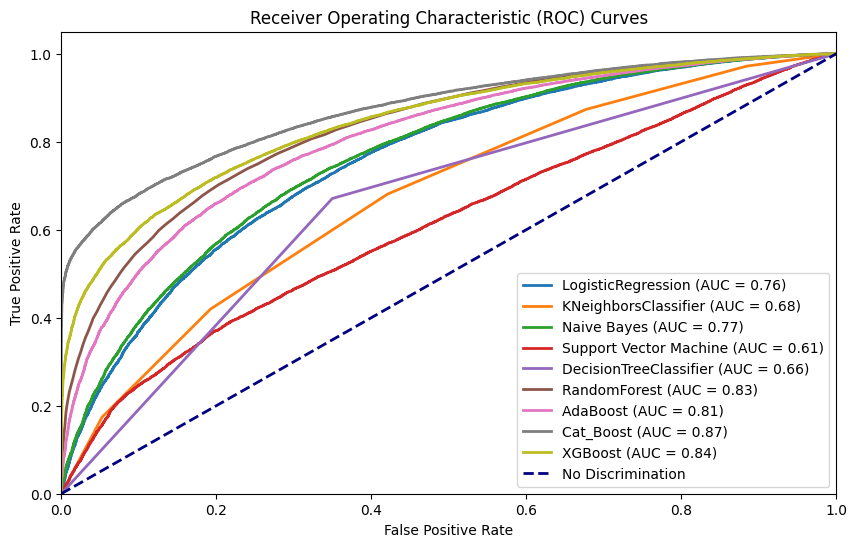

In [40]:
# Initialize the Models class


# List of models with their corresponding labels

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model, name, _ in models:
    # Fit the model
    
    
    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Discrimination')

# Customizing the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

plt.show()

Learning rate set to 0.068328
0:	learn: 0.6779046	total: 15.1ms	remaining: 15.1s
1:	learn: 0.6645968	total: 22.6ms	remaining: 11.3s
2:	learn: 0.6530608	total: 33ms	remaining: 11s
3:	learn: 0.6426617	total: 42.1ms	remaining: 10.5s
4:	learn: 0.6335572	total: 50ms	remaining: 9.96s
5:	learn: 0.6254854	total: 57.7ms	remaining: 9.56s
6:	learn: 0.6182217	total: 66.9ms	remaining: 9.49s
7:	learn: 0.6116190	total: 78.3ms	remaining: 9.71s
8:	learn: 0.6057139	total: 92ms	remaining: 10.1s
9:	learn: 0.6005573	total: 102ms	remaining: 10.1s
10:	learn: 0.5957450	total: 111ms	remaining: 10s
11:	learn: 0.5912583	total: 122ms	remaining: 10s
12:	learn: 0.5872770	total: 133ms	remaining: 10.1s
13:	learn: 0.5834454	total: 150ms	remaining: 10.5s
14:	learn: 0.5800655	total: 163ms	remaining: 10.7s
15:	learn: 0.5770001	total: 172ms	remaining: 10.6s
16:	learn: 0.5741553	total: 182ms	remaining: 10.5s
17:	learn: 0.5712303	total: 195ms	remaining: 10.6s
18:	learn: 0.5689171	total: 208ms	remaining: 10.7s
19:	learn: 0.5

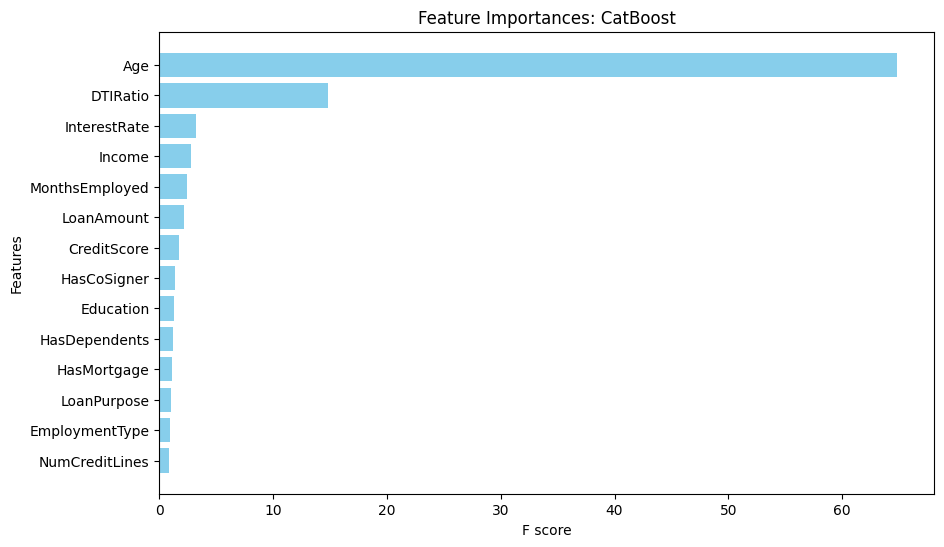

In [38]:

from catboost import CatBoostClassifier, Pool

# Get feature importances


m2 = Models(X_train,Y_train)
model = m2.model_Cat_Boost()
feature_importances = model.get_feature_importance(Pool(X_train, label=Y_train))
feature_names = x.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Features'], importance_df['Importance'], color='skyblue')
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature Importances: CatBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

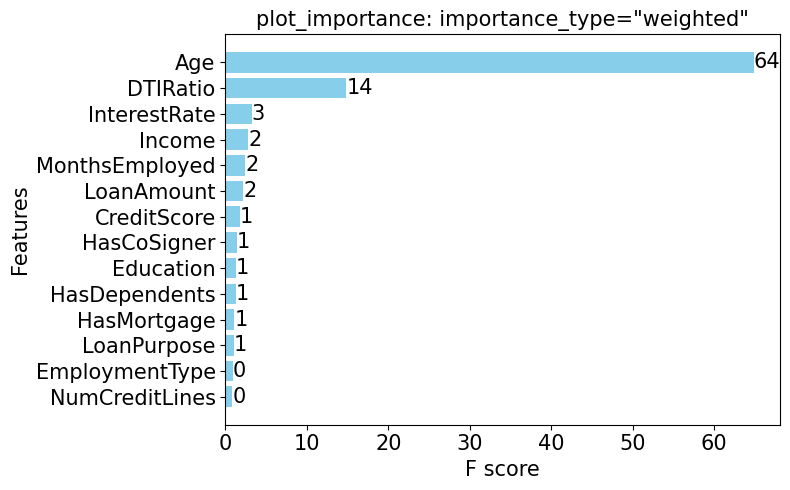

In [57]:
# Get feature importances
feature_importances = model.get_feature_importance(Pool(X_train, label=Y_train))
feature_names = x.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Features'], importance_df['Importance'], color='skyblue')
plt.xlabel('F score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('plot_importance: importance_type="weighted"', fontsize=15)

# Add text labels for each bar, aligned to the right, with increased font size
for i, v in enumerate(importance_df['Importance']):
    plt.text(v , i, str(int(v)), color='black', va='center', fontsize=15)

# Increase font size of tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()